A. Fixers Utilities:

In [2]:
#---------------------------- Program to Demonstrate Fixers utilities -------------------
import string
import datetime as dt


# 1 Removing leading or lagging spaces from a data entry
print('#1 Removing leading or lagging spaces from a data entry');
baddata = " Data Science with too many spaces is bad!!! "
print('>',baddata,'<')
cleandata=baddata.strip()
print('>',cleandata,'<')

#1 Removing leading or lagging spaces from a data entry
>  Data Science with too many spaces is bad!!!  <
> Data Science with too many spaces is bad!!! <


In [3]:
# 2 Removing nonprintable characters from a data entry
print('#2 Removing nonprintable characters from a data entry')
printable = set(string.printable)

baddata = "Data\x00Science with\x02 funny characters is \x10bad!!!"
cleandata=' '.join(filter(lambda x: x in string.printable,baddata))

print('Bad Data : ',baddata);
print('Clean Data : ',cleandata)


#2 Removing nonprintable characters from a data entry
Bad Data :  Data Science with funny characters is bad!!!
Clean Data :  D a t a S c i e n c e   w i t h   f u n n y   c h a r a c t e r s   i s   b a d ! ! !


In [4]:
# 3 Reformatting data entry to match specific formatting criteria.
# Convert YYYY/MM/DD to DD Month YYYY

print('# 3 Reformatting data entry to match specific formatting criteria.')
baddate = dt.date(2019, 10, 31)
baddata=format(baddate,'%Y-%m-%d')

gooddate = dt.datetime.strptime(baddata,'%Y-%m-%d')
gooddata=format(gooddate,'%d %B %Y')

print('Bad Data : ',baddata)
print('Good Data : ',gooddata)


# 3 Reformatting data entry to match specific formatting criteria.
Bad Data :  2019-10-31
Good Data :  31 October 2019


B. Data Binning or Bucketing
Binning is a data preprocessing technique used to reduce the effects of minor observation errors. Statistical 
data binning is a way to group a number of more or less continuous values into a smaller number of “bins.”


In [5]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(0)


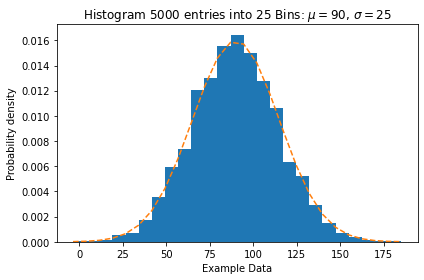

In [8]:
# example data

mu = 90 # mean of distribution
sigma = 25 # standard deviation of distribution
x = mu + sigma * np.random.randn(5000)
num_bins = 25
fig, ax = plt.subplots()


# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = stats.norm.pdf(bins, mu, sigma)

# mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Example Data')
ax.set_ylabel('Probability density')
sTitle= r'Histogram ' + str(len(x)) + ' entries into ' + str(num_bins) + ' Bins: $\mu=' + str(mu) + '$, $\sigma=' + str(sigma) + '$'
ax.set_title(sTitle)
fig.tight_layout()
sPathFig='DU-Histogram.png'
fig.savefig(sPathFig)
plt.show()

C. Averaging of Data

In [10]:
import pandas as pd

#InputFileName='IP_DATA_CORE.csv'
#OutputFileName='Retrieve_Router_Location.csv'

#Base='C:/VKHCG'

#print('################################')
#print('Working Base :',Base, ' using ')
#print('################################')

#sFileName=Base + '/01-Vermeulen/00-RawData/' + InputFileName
#print('Loading :',sFileName)


IP_DATA_ALL=pd.read_csv('/content/IP_DATA_CORE.csv',header=0,low_memory=False, usecols=['Country','Place Name','Latitude','Longitude'], encoding="latin-1")
IP_DATA_ALL.head()


,Country,Place Name,Latitude,Longitude
0,US,New York,40.7528,-73.9725
1,US,New York,40.7528,-73.9725
2,US,New York,40.7528,-73.9725
3,US,New York,40.7528,-73.9725
4,US,New York,40.7528,-73.9725


In [12]:
IP_DATA_ALL.rename(columns={'Place Name': 'Place_Name'}, inplace=True)

AllData=IP_DATA_ALL[['Country', 'Place_Name','Latitude']]

print(AllData)



     Country Place_Name  Latitude
0         US   New York   40.7528
1         US   New York   40.7528
2         US   New York   40.7528
3         US   New York   40.7528
4         US   New York   40.7528
...      ...        ...       ...
3557      DE     Munich   48.0915
3558      DE     Munich   48.1833
3559      DE     Munich   48.1000
3560      DE     Munich   48.1480
3561      DE     Munich   48.1480

[3562 rows x 3 columns]


In [13]:
MeanData=AllData.groupby(['Country', 'Place_Name'])['Latitude'].mean()

print(MeanData)

Country  Place_Name
DE       Munich        48.143223
GB       London        51.509406
US       New York      40.747044
Name: Latitude, dtype: float64


D. Outlier Detection

In [14]:
import pandas as pd

IP_DATA_ALL=pd.read_csv('/content/IP_DATA_CORE.csv',header=0,low_memory=False, usecols=['Country','Place Name','Latitude','Longitude'], encoding="latin-1")

IP_DATA_ALL.rename(columns={'Place Name': 'Place_Name'}, inplace=True)

LondonData=IP_DATA_ALL.loc[IP_DATA_ALL['Place_Name']=='London']

AllData=LondonData[['Country', 'Place_Name','Latitude']]
print('All Data')
print(AllData)



All Data
     Country Place_Name  Latitude
1910      GB     London   51.5130
1911      GB     London   51.5508
1912      GB     London   51.5649
1913      GB     London   51.5895
1914      GB     London   51.5232
...      ...        ...       ...
3434      GB     London   51.5092
3435      GB     London   51.5092
3436      GB     London   51.5163
3437      GB     London   51.5085
3438      GB     London   51.5136

[1502 rows x 3 columns]


In [17]:
MeanData=AllData.groupby(['Country', 'Place_Name'])['Latitude'].mean()
StdData=AllData.groupby(['Country', 'Place_Name'])['Latitude'].std()

print('Outliers')
UpperBound=float(MeanData+StdData)
print('Higher than ', UpperBound)


Outliers
Higher than  51.512635507867415


In [18]:

OutliersHigher=AllData[AllData.Latitude>UpperBound]
print(OutliersHigher)



     Country Place_Name  Latitude
1910      GB     London   51.5130
1911      GB     London   51.5508
1912      GB     London   51.5649
1913      GB     London   51.5895
1914      GB     London   51.5232
1916      GB     London   51.5491
1919      GB     London   51.5161
1920      GB     London   51.5198
1921      GB     London   51.5198
1923      GB     London   51.5237
1924      GB     London   51.5237
1925      GB     London   51.5237
1926      GB     London   51.5237
1927      GB     London   51.5232
3436      GB     London   51.5163
3438      GB     London   51.5136


In [19]:
LowerBound=float(MeanData-StdData)

print('Lower than ', LowerBound)



Lower than  51.506176875621264


In [20]:
OutliersLower=AllData[AllData.Latitude<LowerBound]

print(OutliersLower)


     Country Place_Name  Latitude
1915      GB     London   51.4739


In [21]:
print('Not Outliers')

OutliersNot=AllData[(AllData.Latitude>=LowerBound) & (AllData.Latitude<=UpperBound)]
print(OutliersNot)


Not Outliers
     Country Place_Name  Latitude
1917      GB     London   51.5085
1918      GB     London   51.5085
1922      GB     London   51.5085
1928      GB     London   51.5085
1929      GB     London   51.5085
...      ...        ...       ...
3432      GB     London   51.5092
3433      GB     London   51.5092
3434      GB     London   51.5092
3435      GB     London   51.5092
3437      GB     London   51.5085

[1485 rows x 3 columns]


E. Logging 

In [22]:
import sys
import os
import logging
import uuid
import shutil
import time

In [23]:
sCompanies=['01-Vermeulen','02-Krennwallner','03-Hillman','04-Clark']
sLayers=['01-Retrieve','02-Assess','03-Process','04-Transform','05-Organise','06-Report']
sLevels=['debug','info','warning','error']

In [24]:
Base = '/content' 

for sCompany in sCompanies:
  sFileDir=Base + '/' + sCompany 
  if not os.path.exists(sFileDir):
    os.makedirs(sFileDir)
  for sLayer in sLayers:
    log = logging.getLogger() # root logger
  for hdlr in log.handlers[:]:
    log.removeHandler(hdlr)# remove all old handlers
  sFileDir=Base + '/' + sCompany + '/' + sLayer + '/Logging'
  if os.path.exists(sFileDir):
    shutil.rmtree(sFileDir)
    time.sleep(2)
  if not os.path.exists(sFileDir):
    os.makedirs(sFileDir)
  skey=str(uuid.uuid4()) 
  sLogFile=Base + '/' + sCompany + '/' + sLayer + '/Logging/Logging_'+skey+'.log'
  print('Set up:',sLogFile)


Set up: /content/01-Vermeulen/06-Report/Logging/Logging_1dc389c2-329a-45ac-9d89-0f74fa8b7bda.log
Set up: /content/02-Krennwallner/06-Report/Logging/Logging_5770e896-06a8-41dd-b03c-499eb7be3aeb.log
Set up: /content/03-Hillman/06-Report/Logging/Logging_c3c8420d-9a24-4f32-b4a2-fae11fcf0115.log
Set up: /content/04-Clark/06-Report/Logging/Logging_8bf9d671-62a8-4988-ba16-28d4d8125a63.log


In [25]:
# set up logging to file - see previous section for more details
logging.basicConfig(level=logging.DEBUG,
format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
datefmt='%m-%d %H:%M',
filename=sLogFile,
filemode='w')
# define a Handler which writes INFO messages or higher to the sys.stderr
console = logging.StreamHandler()
console.setLevel(logging.INFO)


In [26]:
# set a format which is simpler for console use
formatter = logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s')
# tell the handler to use this format
console.setFormatter(formatter)
# add the handler to the root logger
logging.getLogger('').addHandler(console)
# Now, we can log to the root logger, or any other logger. First the root...
logging.info('Practical Data Science is fun!.')

root        : INFO     Practical Data Science is fun!.


In [27]:
for sLevel in sLevels:
  sApp='Apllication-'+ sCompany + '-' + sLayer + '-' + sLevel
  logger = logging.getLogger(sApp)
  if sLevel == 'debug': 
    logger.debug('Practical Data Science logged a debugging message.')
  if sLevel == 'info': 
    logger.info('Practical Data Science logged information message.')
  if sLevel == 'warning': 
    logger.warning('Practical Data Science logged a warning message.')
  if sLevel == 'error': 
    logger.error('Practical Data Science logged an error message.')

Apllication-04-Clark-06-Report-info: INFO     Practical Data Science logged information message.
Apllication-04-Clark-06-Report-warning: WARNING  Practical Data Science logged a warning message.
Apllication-04-Clark-06-Report-error: ERROR    Practical Data Science logged an error message.
